In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [6]:
# We need a lookup table of characters to integers so we can use the tensor of integers
# We can do this by simply creating a set from all the words (throwing out dups)
chars = sorted(list(set(''.join(words))))
# Make a mapping of each char to an integer
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
# Inverse mapping of stoi for plotting
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [93]:
# Build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [95]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [183]:
def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])



torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [185]:
n2

28829

In [12]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [13]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [17]:
# Lookup table C for our characters
C = torch.randn((27, 2))

In [18]:
C[5]

tensor([0.1939, 1.1083])

In [30]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [28]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [35]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [50]:
emb.view(emb.shape[0], 6) == torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [53]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [54]:
h

tensor([[-0.6468,  1.0000, -0.1885,  ...,  0.9998,  0.9774,  1.0000],
        [-0.1328,  0.9920, -0.9903,  ..., -0.4285,  0.0283,  0.9999],
        [ 0.9982, -0.7104, -0.9971,  ..., -0.6273,  0.9300,  0.9996],
        ...,
        [ 1.0000, -0.9988, -0.9235,  ..., -0.9995,  0.9995, -0.9695],
        [-1.0000,  0.9998,  0.8047,  ...,  1.0000,  0.4512, -0.8358],
        [-0.9999,  0.7652,  0.9878,  ..., -0.9955, -0.9691,  0.1958]])

In [55]:
h.shape

torch.Size([32, 100])

In [56]:
b1.shape

torch.Size([100])

In [ ]:
# 32, 100
#   , 100

In [58]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [59]:
logits = h @ W2 + b2

In [60]:
logits.shape

torch.Size([32, 27])

In [62]:
counts = logits.exp()

In [64]:
prob = counts / counts.sum(1, keepdims = True)
prob.shape

torch.Size([32, 27])

In [66]:
prob[0].sum()

tensor(1.0000)

In [71]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.9939)

In [186]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182580, 3]), torch.Size([182580]))

In [ ]:
# ------------------------- cleaned up version of the foregoing ----#

In [223]:
g = torch.Generator().manual_seed(214783647) # for reproducability
C = torch.randn((27, 10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [224]:
sum(p.nelement() for p in parameters) # of params total

11897

In [225]:
for p in parameters:
    p.requires_grad = True

In [226]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [227]:
lri = []
lossi = []
stepi = []

In [236]:
for i in range(50000):
    # Minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # FORWARD PASS
    emb = C[Xtr[ix]] # [32, 3, 2]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # [32, 100]
    logits = h @ W2 + b2 # [32, 27]
    # counts = logits.exp() # [32, 27]
    # prob = counts / counts.sum(1, keepdims=True) # [32, 27]
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    
    # Built in pytorch function to do all the above starting after logits
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    # UPDATE
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

1.9752618074417114


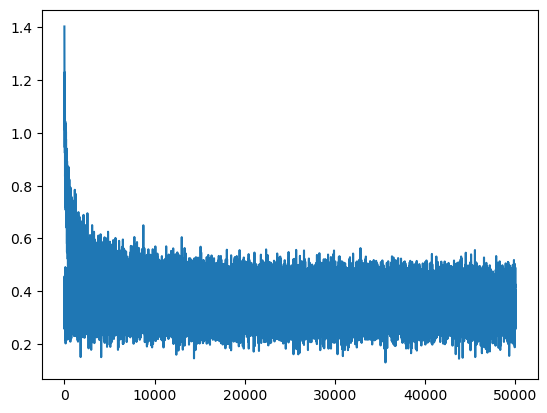

In [235]:
plt.plot(stepi, lossi)

In [237]:
emb = C[Xtr] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # [32, 100]
logits = h @ W2 + b2 # [32, 27]
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1696, grad_fn=<NllLossBackward0>)

In [238]:
emb = C[Xdev] # [32, 3, 2]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # [32, 100]
logits = h @ W2 + b2 # [32, 27]
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2114, grad_fn=<NllLossBackward0>)

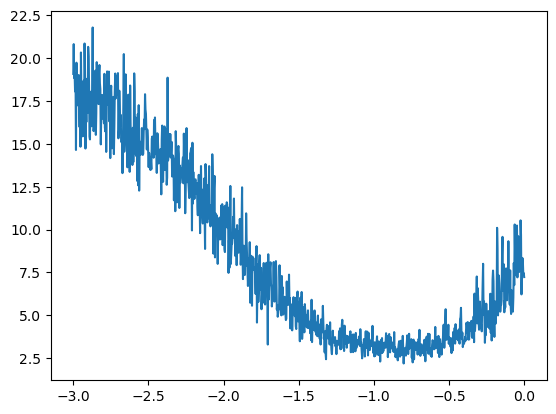

In [158]:
plt.plot(lri, lossi)

In [ ]:
# training split, dev/validation split, test split
# 80 / 10 / 10 %

In [243]:
# Sample from the model
for _ in range(20):
    out = []
    context = [0] * block_size
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(-1, 1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmaxx(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
        break

    print(''.join(itos[i] for i in out))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (30x1 and 30x200)